### -Reciprocal transform
### -power transform
### -log transform
### -Box-cox

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv')


In [4]:
df=df[['Age','Fare','Survived']]

In [5]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

C:\Users\adity\AppData\Local\Temp\ipykernel_14924\172884704.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


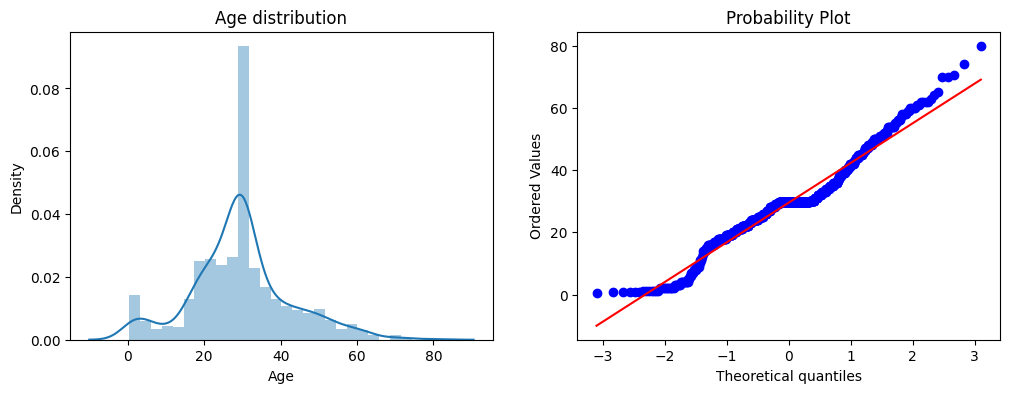

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Age distribution')
sns.distplot(x_train['Age'])

plt.subplot(122)
plt.title('Age QQ plot')
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.show()



C:\Users\adity\AppData\Local\Temp\ipykernel_14924\1817565184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


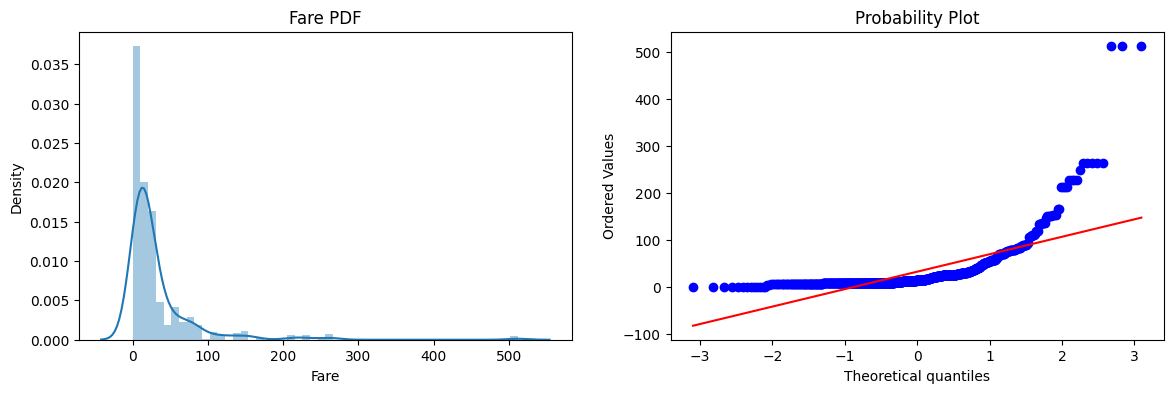

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Fare PDF")
sns.distplot(x_train['Fare'])

plt.subplot(122)
plt.title('fare QQ plot')
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.show()


In [26]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [27]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)


y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

print("LR accuracy=",accuracy_score(y_test,y_pred1))
print("DC accuracy=",accuracy_score(y_test,y_pred2))

LR accuracy= 0.6480446927374302
DC accuracy= 0.664804469273743


#### is this possible , accuracy will increase by using transformation

In [28]:
trf=FunctionTransformer(func=np.log1p)

In [29]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.transform(x_test)

In [36]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)

y_pred1=clf1.predict(x_test_trans)
y_pred2=clf2.predict(x_test_trans)

print("LR accuracy=",accuracy_score(y_test,y_pred1))
print("DC accuracy=",accuracy_score(y_test,y_pred2))


LR accuracy= 0.6815642458100558
DC accuracy= 0.659217877094972


C:\Users\adity\AppData\Local\Temp\ipykernel_14924\3387506879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trans['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

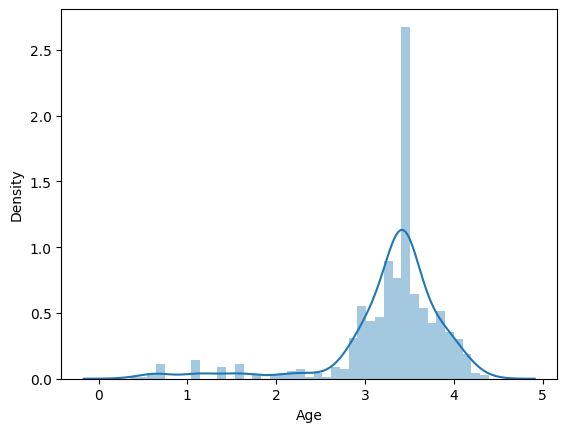

In [35]:
sns.distplot(x_train_trans['Age'])

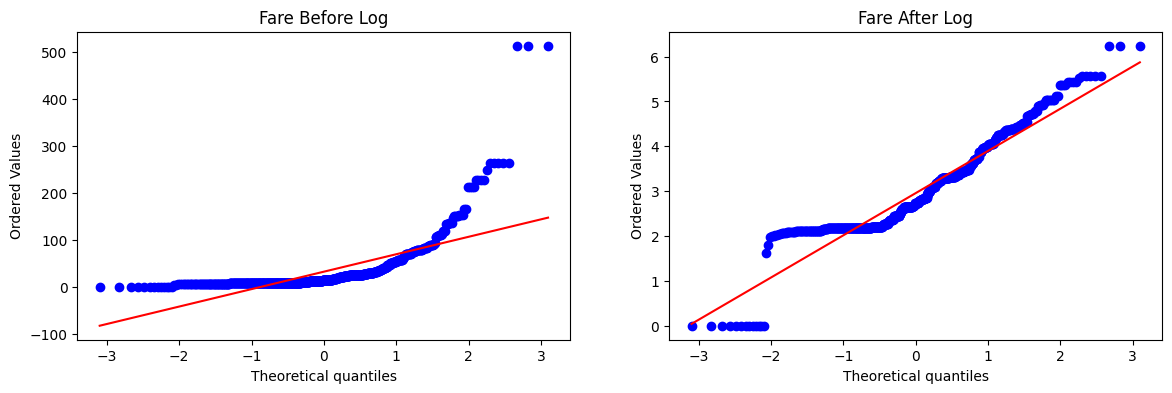

In [37]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_trans['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

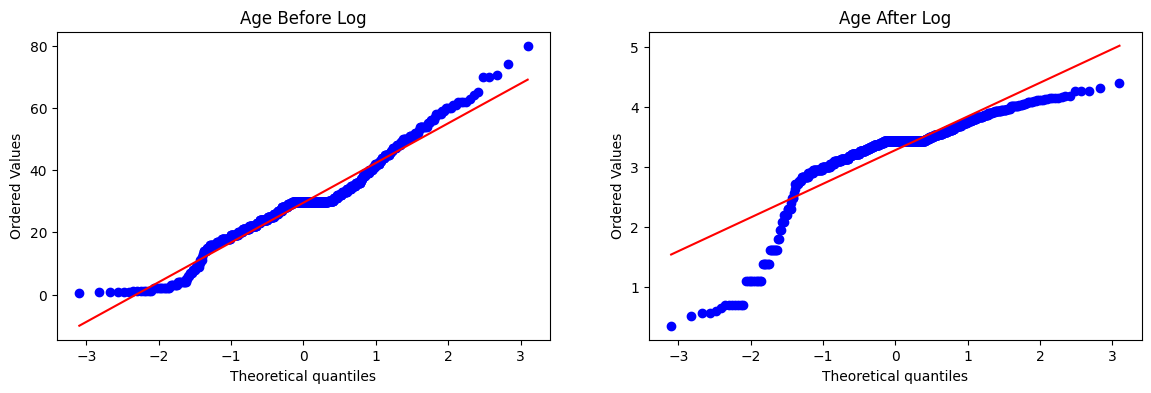

In [38]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_trans['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

on  fare column  it work , data is coming to normal distribution ,
but on age column data is going away from normal distribution